<h1><center><font size="15">APRENDIZAJE AUTOMÁTICO (ISI-306)</font></center></h1>

<img src="Logo_1.png" width=800 height=600 />

<h1><center><font size="5">TEMA 2: REGRESIÓN MÚLTIPLE</font></center></h1>

# LABORATORIO 2

#### ING: K. MARLON SOZA MAMANI

### Nombre: Rosalía Reynaga Funes 

Importación de librerías:

In [18]:
# Importamos las librerias de OpenCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Ejercicio 1

Utilizar el dataset (conjunto de datos de entrenamiento) "House_price.csv" para realizar una regresión múltiple con las columnas correspondientes a "Avg. Area Income"(Promedio de ingresos del área) y "Number of Rooms" (Número de habitaciones) como caracteristicas de referencia respectivamente. Así mismo, utilice la columna "Price" (Precio) como dato de interés.


Normalize los datos

Utilice los parámetros de entrenamiento que crea conveniente.

Muestre el modelo predecido 2D.

Muestre el modelo predecido 3D.

Muestre la evolución del error.

Muestre la predicción del modelo a valores de referencia mayores a los datos de entrenamiento.

In [3]:
# --- Lectura de datos
data = pd.read_csv('House_price.csv')

# --- Visualizar datos automaticamente
data.head()

#--------------------------------------------------------

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [86]:
# --- Obtener datos de las columnas (solo valores)
X = data.values[:, [0,2]]
Y = data.values[:, 5]
X = X.astype(float) #convierte los daos a floats
print("Número de observaciones: "+str(len(Y)))
##print(X)

Número de observaciones: 4548


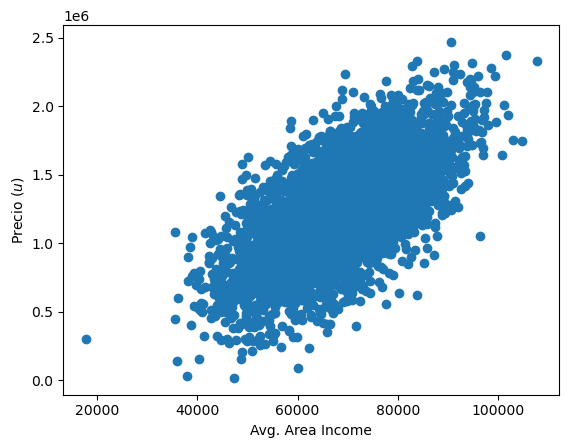

In [22]:
# --- Graficar datos en H1(X)
plt.scatter(X[:,0], Y)
plt.xlabel("Avg. Area Income")
plt.ylabel("Precio ($u$)")
plt.show()
#--------------------------------------------------------

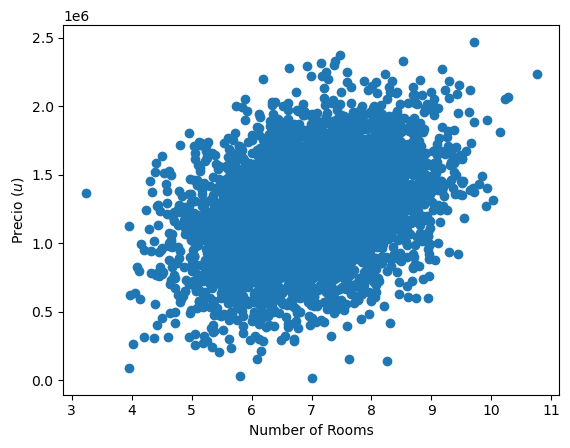

In [23]:
# --- Graficar datos en H2(X)
plt.scatter(X[:,1], Y)
plt.xlabel("Number of Rooms")
plt.ylabel("Precio ($u$)")
plt.show()
#--------------------------------------------------------

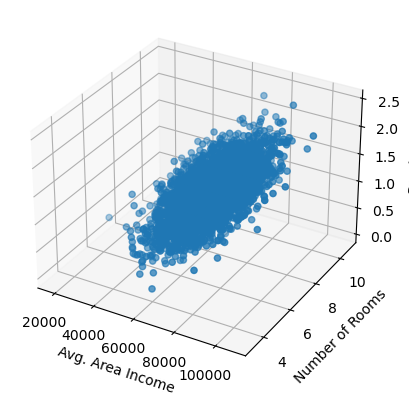

In [24]:
# --- Graficar datos en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
ax.set_xlabel("Avg. Area Income")
ax.set_ylabel("Number of Rooms")
ax.set_zlabel("Precio ($u$)")
plt.show()
#-------------------

### Normalizando datos

In [87]:
# --- Obtener la media
mu = np.mean(X, axis = 0)
print("La media de X es igual a: "+str(mu))

# --- Obtener la desviación estandar
sigma = np.std(X, axis= 0, ddof = 1)
print("La desviación estandar de X es igual a: "+ str(sigma))

# --- Obtener la matriz X normalizada
X_norm = (X - mu)/sigma
print("La matriz X normalizada es igual a: ")
print(np.around(X_norm,2))
#--------------------------------------------------------
#--------------------------------------------------------

La media de X es igual a: [6.86117008e+04 6.98764594e+00]
La desviación estandar de X es igual a: [1.06864878e+04 1.00658697e+00]
La matriz X normalizada es igual a: 
[[ 1.02  0.02]
 [ 1.   -0.26]
 [-0.69  1.52]
 ...
 [-0.27 -0.28]
 [ 0.7   0.55]
 [-0.16  1.52]]


In [90]:
X_or = X
X = np.hstack((np.ones((len(Y),1)), X_norm))
print(np.around(X,2))

[[ 1.    1.02  0.02]
 [ 1.    1.   -0.26]
 [ 1.   -0.69  1.52]
 ...
 [ 1.   -0.27 -0.28]
 [ 1.    0.7   0.55]
 [ 1.   -0.16  1.52]]


## Parametros de entrenamiento

In [91]:
# --- Coeficientes de regresión
w = np.zeros(X.shape[1])

# --- Parámetros de entrenamiento
n = 0.00001 # Tamaño de paso (stepsize)
epochs = 10000  # Número de iteraciones
N = float(len(Y)) # Número de elementos en Y

# --- Parámetros de error
Error = [0] * epochs
T = np.arange(1, epochs + 1)
#--------------------------------------------------------

### Proceso de entrenamiento por medio de Gradiente Descendiente

In [92]:
# --- Iteraciones para la gradiente descendiente
for i in range(epochs):
    
    # --- Programar el proceso de entrenamiento
    
    Y_pred = X.dot(w) #--- Y predecida ---> Hw
    error= np.subtract(Y,Y_pred) # error --> Y-Hw
    RSS= error.transpose().dot(error) # Desempeño 
    Error[i]=RSS # ---- almacenamiento del eror
    
    D_w= -2*X.transpose().dot(error) # error Grdiente sw Rss -2H * rosado
    w= w - n*D_w #gradiente desensiente 
    #--------------------------------------------------------

In [93]:
# --- Resultados del entrenamiento
print("Resultados del entrenamiento: ")
print(w)
#--------------------------------------------------------

Resultados del entrenamiento: 
[1233915.795020821 228221.3561136805 122614.99703427473]


### Modelo predecido

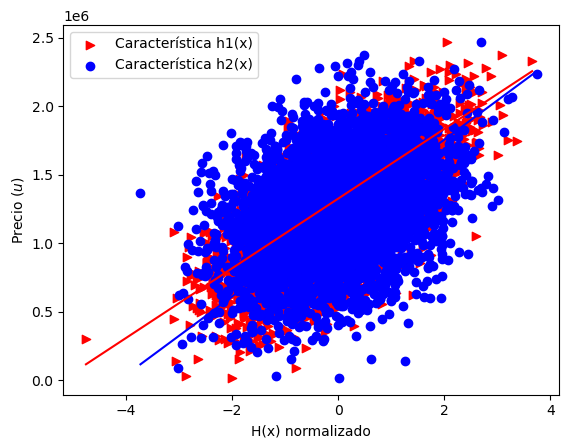

In [94]:
# --- Graficar modelo predecido normalizado en 2D

plt.scatter(X[:,1], Y, marker='>', color = 'red', label = 'Característica h1(x)') # Datos h1(x)
plt.plot([min(X[:,1]), max(X[:,1])], [min(Y_pred), max(Y_pred)], color='red') # Linea de regresion h1(x)
plt.scatter(X[:,2], Y, marker='o', color = 'blue',label = 'Característica h2(x)') # Datos h2(x)
plt.plot([min(X[:,2]), max(X[:,2])], [min(Y_pred), max(Y_pred)], color='blue') # Linea de regresion h2(x)
plt.xlabel("H(x) normalizado")
plt.ylabel("Precio ($u$)")
plt.legend()
plt.show()
#--------------------------------------------------------

### Grafica en 3D

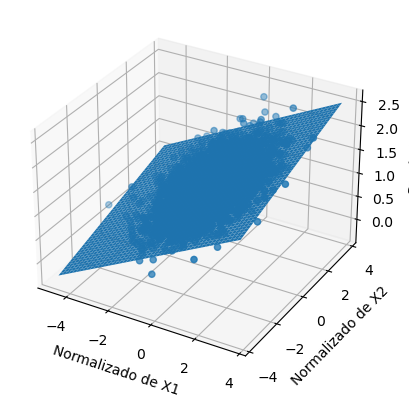

In [95]:
# --- Graficar datos normalizados en 3D

# --- Definir un conjunto de puntos para el plano
x = np.linspace(min(X[:,1]), max(X[:,1]))
y = np.linspace(min(X[:,2]), max(X[:,2]))

# --- Definir el plano con la ecuación
x_eq, y_eq = np.meshgrid(x, y)
eq = w[0] + w[1] * x_eq + w[2] * y_eq

# --- Grafica en 3D de los puntos normalizados y el plano
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1],X[:,2],Y) # Dibujar puntos
ax.plot_surface(x_eq, y_eq, eq) # Dibujar plano
ax.set_xlabel("Normalizado de X1")
ax.set_ylabel("Normalizado de X2")
ax.set_zlabel("Precio ($u$)")
plt.show()
#--------------------------------------------------------

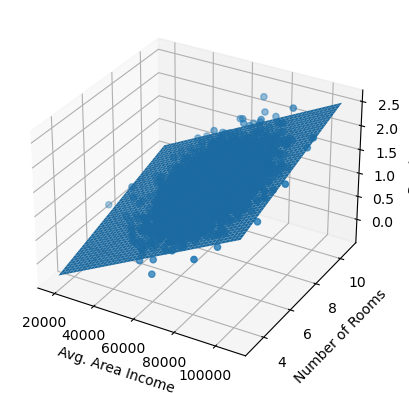

In [96]:
# --- Graficar datos reales en 3D

# --- Definir un conjunto de puntos reales para el plano
x_or = np.linspace(min(X_or[:,0]), max(X_or[:,0]))
y_or = np.linspace(min(X_or[:,1]), max(X_or[:,1]))

# --- Definir el plano
x_1_or, y_1_or = np.meshgrid(x_or, y_or)

# --- Grafica en 3D de los puntos reales y el plano
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_or[:,0],X_or[:,1],Y) # Dibujar puntos
ax.plot_surface(x_1_or, y_1_or, eq) # Dibujar plano
ax.set_xlabel("Avg. Area Income")
ax.set_ylabel("Number of Rooms")
ax.set_zlabel("Precio ($u$)")
plt.show()
#--------------------------------------------------------

### Comportamiento del error

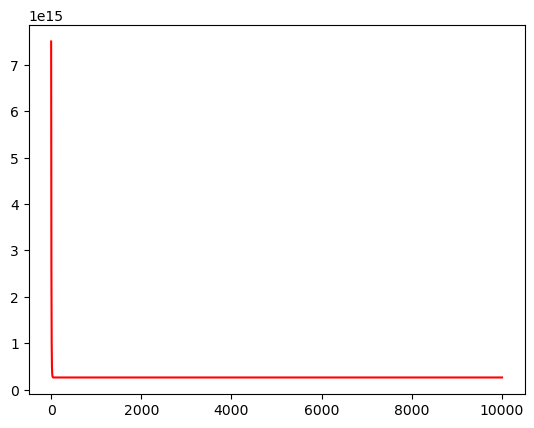

Valor mínimo del error = 268125938645786.7


In [55]:
# --- Grafica de error

plt.plot(T, Error, '-r') # Graficar datos
plt.show()
Min_E = min(Error)
print("Valor mínimo del error = "+str(Min_E))
#--------------------------------------------------------

### Predecir valores

Característica h1(x) = 120000, Característica h2(x) = 12, Valor predecido Y = 2941935.7752060303


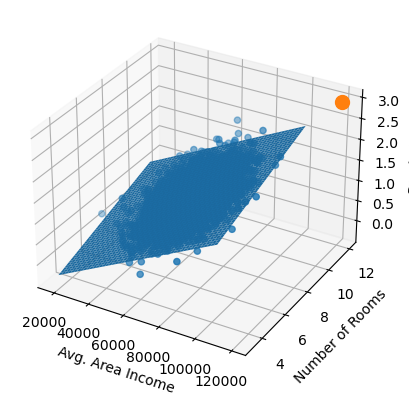

In [97]:
# --- Predecir valores

X1 = 120000 # Valor en h1(X) AVG
X2 = 12 # Valor en h2(X) # cuartos

# --- Normalizar valores
X1_norm = (X1 - mu[0])/sigma[0]
X2_norm = (X2 - mu[1])/sigma[1]

# --- Mostrar valor predecido
Y_point = w[0] + w[1]*X1_norm + w[2]*X2_norm # Valor en Y
print ("Característica h1(x) = "+str(X1)+
       ", Característica h2(x) = "+str(X2)+
       ", Valor predecido Y = "+str(Y_point))

# --- Graficar punto predecido
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_or[:,0],X_or[:,1],Y) # Dibujar puntos
ax.plot_surface(x_1_or, y_1_or, eq) # Dibujar plano
ax.scatter(X1, X2, Y_point, s=100) # Dibujar punto predecido
ax.set_xlabel("Avg. Area Income")
ax.set_ylabel("Number of Rooms")
ax.set_zlabel("Precio ($u$)")
plt.show()
#--------------------------------------------------------

## Ejercicio 2

Utilizar el dataset (conjunto de datos de entrenamiento) "House_price.csv" para realizar una regresión múltiple con tres o más columnas como caracteristicas de referencia. Así mismo, utilice la columna "Price" (Precio) como dato de interés.


Normalize los datos

Utilice los parámetros de entrenamiento que crea conveniente.

Muestre el modelo predecido 2D.

Muestre la evolución del error.

Muestre la predicción del modelo a valores de referencia mayores a los datos de entrenamiento.

### Obtencion de datos

In [117]:

# --- Lectura de datos
data = pd.read_csv('House_price.csv')

# --- Visualizar datos automaticamente
data.head()

#--------------------------------------------------------

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [118]:

# --- Obtener datos de las columnas (solo valores)
X = data.values[:, [1,2,3]]
Y = data.values[:, 5]
X = X.astype(float) #convierte los datos a floats
print("Número de observaciones: "+str(len(Y)))
#print(X)
num_columnas = len(X[0])  # Obtener el número de columnas

maximos_por_columna = []

for columna in range(num_columnas):
    max_valor_columna = max(row[columna] for row in X)
    maximos_por_columna.append(max_valor_columna)
print("El mayor elemento de cada columna es:", maximos_por_columna)

Número de observaciones: 4548
El mayor elemento de cada columna es: [9.519088066, 10.75958834, 6.5]


### Normalizando los datos

In [119]:
# --- Obtener la media
mu = np.mean(X, axis = 0)
print("La media de X es igual a: "+str(mu))

# --- Obtener la desviación estandar
sigma = np.std(X, axis= 0, ddof = 1)
print("La desviación estandar de X es igual a: "+ str(sigma))

# --- Obtener la matriz X normalizada
X_norm = (X - mu)/sigma
print("La matriz X normalizada es igual a: ")
print(np.around(X_norm,2))
#--------------------------------------------------------

La media de X es igual a: [5.97891844 6.98764594 3.98169305]
La desviación estandar de X es igual a: [0.99084986 1.00658697 1.23093867]
La matriz X normalizada es igual a: 
[[-0.3   0.02  0.09]
 [ 0.02 -0.26 -0.72]
 [-0.11  1.52  0.93]
 ...
 [ 0.46 -0.28 -0.68]
 [ 1.18  0.55  1.88]
 [ 0.4   1.52  1.21]]


In [120]:
X_or = X
X = np.hstack((np.ones((len(Y),1)), X_norm))
print(np.around(X,2))

[[ 1.   -0.3   0.02  0.09]
 [ 1.    0.02 -0.26 -0.72]
 [ 1.   -0.11  1.52  0.93]
 ...
 [ 1.    0.46 -0.28 -0.68]
 [ 1.    1.18  0.55  1.88]
 [ 1.    0.4   1.52  1.21]]


### Parámetros del modelo de entrenamiento

In [121]:
# --- Coeficientes de regresión
w = np.zeros(X.shape[1])

# --- Parámetros de entrenamiento
n = 0.00001 # Tamaño de paso (stepsize)
epochs = 10000  # Número de iteraciones
N = float(len(Y)) # Número de elementos en Y

# --- Parámetros de error
Error = [0] * epochs
T = np.arange(1, epochs + 1)
#--------------------------------------------------------

### Proceso de entrenamiento por gradiente Descendiente

In [122]:
# --- Iteraciones para la gradiente descendiente
for i in range(epochs):
    
    # --- Programar el proceso de entrenamiento
    
    Y_pred = X.dot(w) #--- Y predecida ---> Hw
    error= np.subtract(Y,Y_pred) # error --> Y-Hw
    RSS= error.transpose().dot(error) # Desempeño 
    Error[i]=RSS # ---- almacenamiento del eror
    
    D_w= -2*X.transpose().dot(error) # error Grdiente sw Rss -2H * rosado
    w= w - n*D_w #gradiente descendiente 
    #--------------------------------------------------------

In [123]:
# --- Resultados del entrenamiento
print("Resultados del entrenamiento: ")
print(w)
#--------------------------------------------------------

Resultados del entrenamiento: 
[1233915.7950208213 159165.0424127016 117472.05380130716 6913.033746076088]


### Modelo predecido en 2d

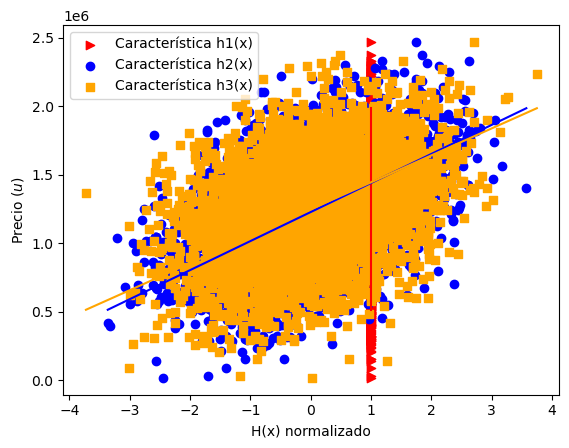

In [124]:
# --- Graficar modelo predecido normalizado en 2D

# Característica 1
plt.scatter(X[:,0], Y, marker='>', color='red', label='Característica h1(x)')
plt.plot([min(X[:,0]), max(X[:,0])], [min(Y_pred), max(Y_pred)], color='red')

# Característica 2
plt.scatter(X[:,1], Y, marker='o', color='blue', label='Característica h2(x)')
plt.plot([min(X[:,1]), max(X[:,1])], [min(Y_pred), max(Y_pred)], color='blue')

# Característica 3
plt.scatter(X[:,2], Y, marker='s', color='orange', label='Característica h3(x)')
plt.plot([min(X[:,2]), max(X[:,2])], [min(Y_pred), max(Y_pred)], color='orange')

plt.xlabel("H(x) normalizado")
plt.ylabel("Precio ($u$)")
plt.legend()
plt.show()

### Comportamiento del error

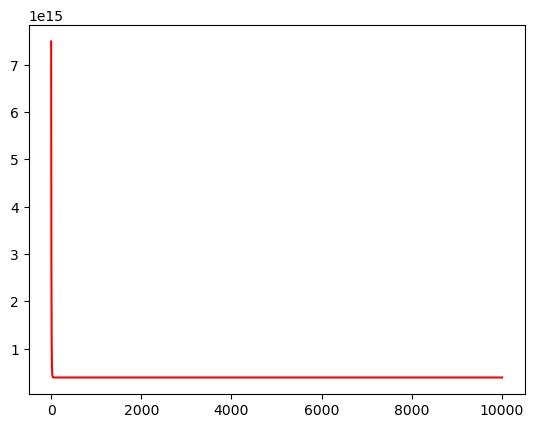

Valor mínimo del error = 389420117335378.1


In [125]:
# --- Grafica de error

plt.plot(T, Error, '-r') # Graficar datos
plt.show()
Min_E = min(Error)
print("Valor mínimo del error = "+str(Min_E))
#--------------------------------------------------------

### Predeccir valores

El mayor elemento de cada columna es: [9.519088066, 10.75958834, 6.5]


In [126]:
# --- Predecir valores

X1 = 10 # Valor en h1(X) 
X2 = 12 # Valor en h2(X)
X3 = 7 # Valor en h3(x)

# --- Normalizar valores
X1_norm = (X1 - mu[0])/sigma[0]
X2_norm = (X2 - mu[1])/sigma[1]
X3_norm = (X3 - mu[2])/sigma[2]

# --- Mostrar valor predecido
Y_point = w[0] + w[1]*X1_norm + w[2]*X2_norm + w[3]*X3_norm # Valor en Y
print ("Característica h1(x) = "+str(X1)+
       ", Característica h2(x) = "+str(X2)+
       ", Característica h3(x) = "+str(X3)+
       ", Valor predecido Y = "+str(Y_point))


#--------------------------------------------------------

Característica h1(x) = 10, Característica h2(x) = 12, Característica h3(x) = 7, Valor predecido Y = 2481751.1567837386
